# **Twitch Streamer Analysis**

# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import os

# Reading the Data

In [3]:
df = pd.read_csv('twitchdata-update.csv')
df

,Channel,Watch time(Minutes),Stream time(minutes),Peak viewers,Average viewers,Followers,Followers gained,Views gained,Partnered,Mature,Language
0,xQcOW,6196161750,215250,222720,27716,3246298,1734810,93036735,True,False,English
1,summit1g,6091677300,211845,310998,25610,5310163,1370184,89705964,True,False,English
2,Gaules,5644590915,515280,387315,10976,1767635,1023779,102611607,True,True,Portuguese
3,ESL_CSGO,3970318140,517740,300575,7714,3944850,703986,106546942,True,False,English
4,Tfue,3671000070,123660,285644,29602,8938903,2068424,78998587,True,False,English
...,...,...,...,...,...,...,...,...,...,...,...
995,LITkillah,122524635,13560,21359,9104,601927,562691,2162107,True,False,Spanish
996,빅헤드 (bighead033),122523705,153000,3940,793,213212,52289,4399897,True,False,Korean
997,마스카 (newmasca),122452320,217410,6431,567,109068,-4942,3417970,True,False,Korean
998,AndyMilonakis,122311065,104745,10543,1153,547446,109111,3926918,True,False,English


# Understanding the Data

In [4]:
df.dtypes

Channel                 object
Watch time(Minutes)      int64
Stream time(minutes)     int64
Peak viewers             int64
Average viewers          int64
Followers                int64
Followers gained         int64
Views gained             int64
Partnered                 bool
Mature                    bool
Language                object
dtype: object

In [5]:
df.shape

(1000, 11)

In [6]:
df.size

11000

In [7]:
df.columns

Index(['Channel', 'Watch time(Minutes)', 'Stream time(minutes)',
       'Peak viewers', 'Average viewers', 'Followers', 'Followers gained',
       'Views gained', 'Partnered', 'Mature', 'Language'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Channel               1000 non-null   object
 1   Watch time(Minutes)   1000 non-null   int64 
 2   Stream time(minutes)  1000 non-null   int64 
 3   Peak viewers          1000 non-null   int64 
 4   Average viewers       1000 non-null   int64 
 5   Followers             1000 non-null   int64 
 6   Followers gained      1000 non-null   int64 
 7   Views gained          1000 non-null   int64 
 8   Partnered             1000 non-null   bool  
 9   Mature                1000 non-null   bool  
 10  Language              1000 non-null   object
dtypes: bool(2), int64(7), object(2)
memory usage: 72.4+ KB


In [8]:
df.describe()

,Watch time(Minutes),Stream time(minutes),Peak viewers,Average viewers,Followers,Followers gained,Views gained
count,1.000000e+03,1000.000000,1000.000000,1000.000000,1.000000e+03,1.000000e+03,1.000000e+03
mean,4.184279e+08,120515.160000,37065.051000,4781.040000,5.700541e+05,2.055185e+05,1.166817e+07
std,5.496355e+08,85376.201364,60314.307686,8453.684965,8.044134e+05,3.399137e+05,2.490572e+07
min,1.221928e+08,3465.000000,496.000000,235.000000,3.660000e+03,-1.577200e+04,1.757880e+05
25%,1.631899e+08,73758.750000,9113.750000,1457.750000,1.705462e+05,4.375825e+04,3.880602e+06
50%,2.349908e+08,108240.000000,16676.000000,2425.000000,3.180630e+05,9.835200e+04,6.456324e+06
75%,4.337399e+08,141843.750000,37569.750000,4786.250000,6.243322e+05,2.361308e+05,1.219676e+07
max,6.196162e+09,521445.000000,639375.000000,147643.000000,8.938903e+06,3.966525e+06,6.701375e+08


In [11]:
df.corr()

/tmp/ipykernel_34477/1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Watch time(Minutes),Stream time(minutes),Peak viewers,Average viewers,Followers,Followers gained,Views gained,Partnered,Mature
Watch time(Minutes),1.000000,0.150588,0.582797,0.476165,0.620234,0.514648,0.529862,0.038258,-0.043197
Stream time(minutes),0.150588,1.000000,-0.119540,-0.249248,-0.091299,-0.158165,0.064370,-0.007073,0.044978
Peak viewers,0.582797,-0.119540,1.000000,0.682637,0.532529,0.470415,0.298063,0.028112,-0.082750
Average viewers,0.476165,-0.249248,0.682637,1.000000,0.428303,0.420097,0.250349,-0.008983,-0.081648
Followers,0.620234,-0.091299,0.532529,0.428303,1.000000,0.715618,0.276467,0.044418,-0.088521
Followers gained,0.514648,-0.158165,0.470415,0.420097,0.715618,1.000000,0.244297,0.027465,-0.093001
Views gained,0.529862,0.064370,0.298063,0.250349,0.276467,0.244297,1.000000,-0.035313,-0.088119
Partnered,0.038258,-0.007073,0.028112,-0.008983,0.044418,0.027465,-0.035313,1.000000,0.000972
Mature,-0.043197,0.044978,-0.082750,-0.081648,-0.088521,-0.093001,-0.088119,0.000972,1.000000


In [10]:
df.nunique()

Channel                 1000
Watch time(Minutes)     1000
Stream time(minutes)     962
Peak viewers             990
Average viewers          926
Followers               1000
Followers gained         998
Views gained            1000
Partnered                  2
Mature                     2
Language                  21
dtype: int64

In [12]:
df.isnull().sum()

Channel                 0
Watch time(Minutes)     0
Stream time(minutes)    0
Peak viewers            0
Average viewers         0
Followers               0
Followers gained        0
Views gained            0
Partnered               0
Mature                  0
Language                0
dtype: int64

# Exploratory Data Analysis

<AxesSubplot:>

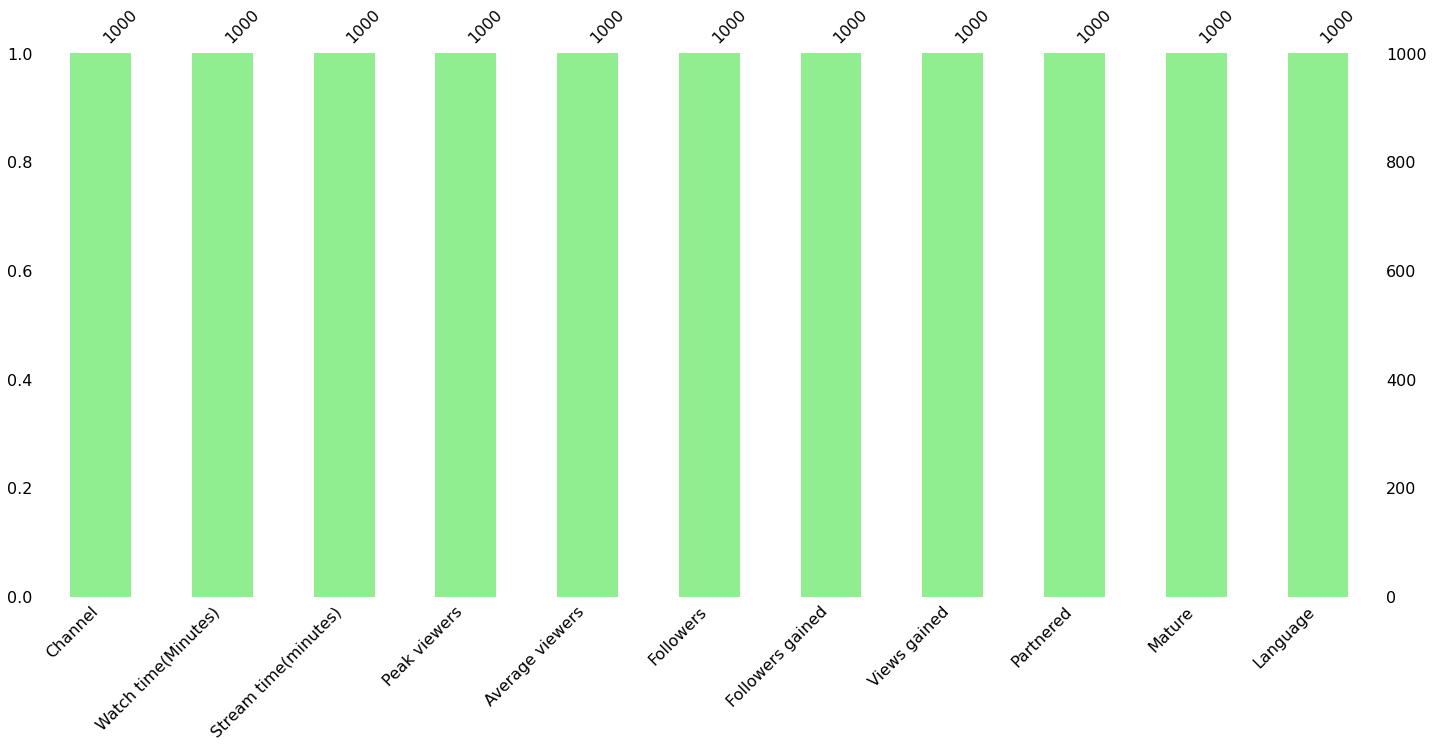

In [12]:
import missingno as no
no.bar(df, color='lightgreen')

<AxesSubplot: >

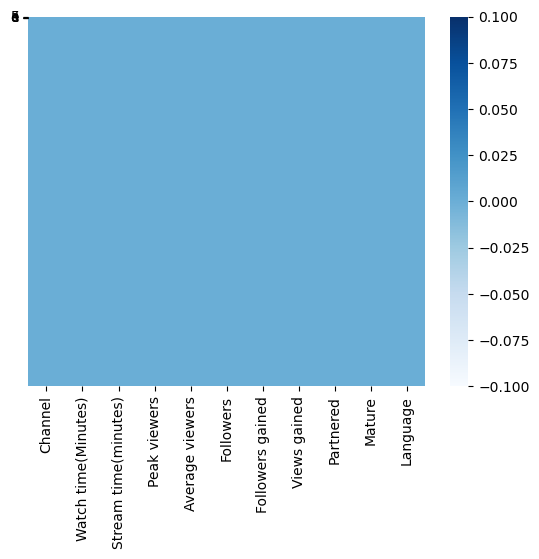

In [13]:
sns.heatmap(df.isnull(), yticklabels='False', cmap='Blues')

<AxesSubplot: >

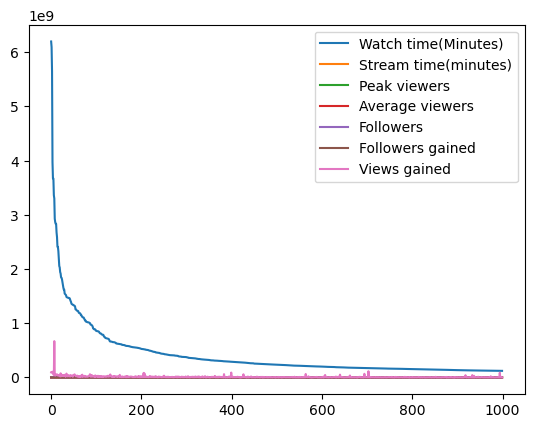

In [14]:
df.plot()

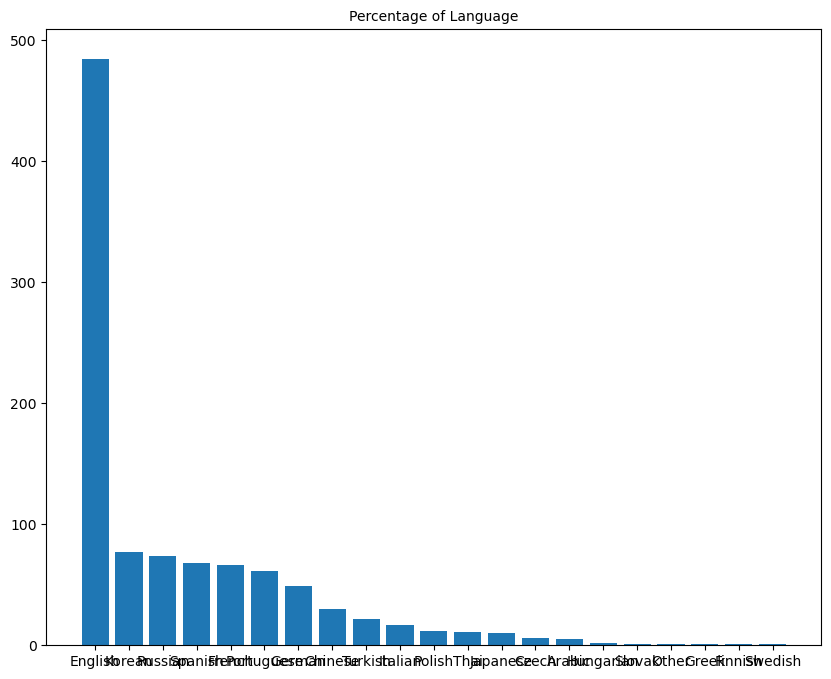

In [19]:
plt.figure(figsize=(10,8))
df1 = df['Language'].value_counts()
plt.bar(df1.index, df1.values)
plt.title('Percentage of Language', fontsize=10)
plt.show()

Text(0.5, 1.0, 'Top views gained Channels are')

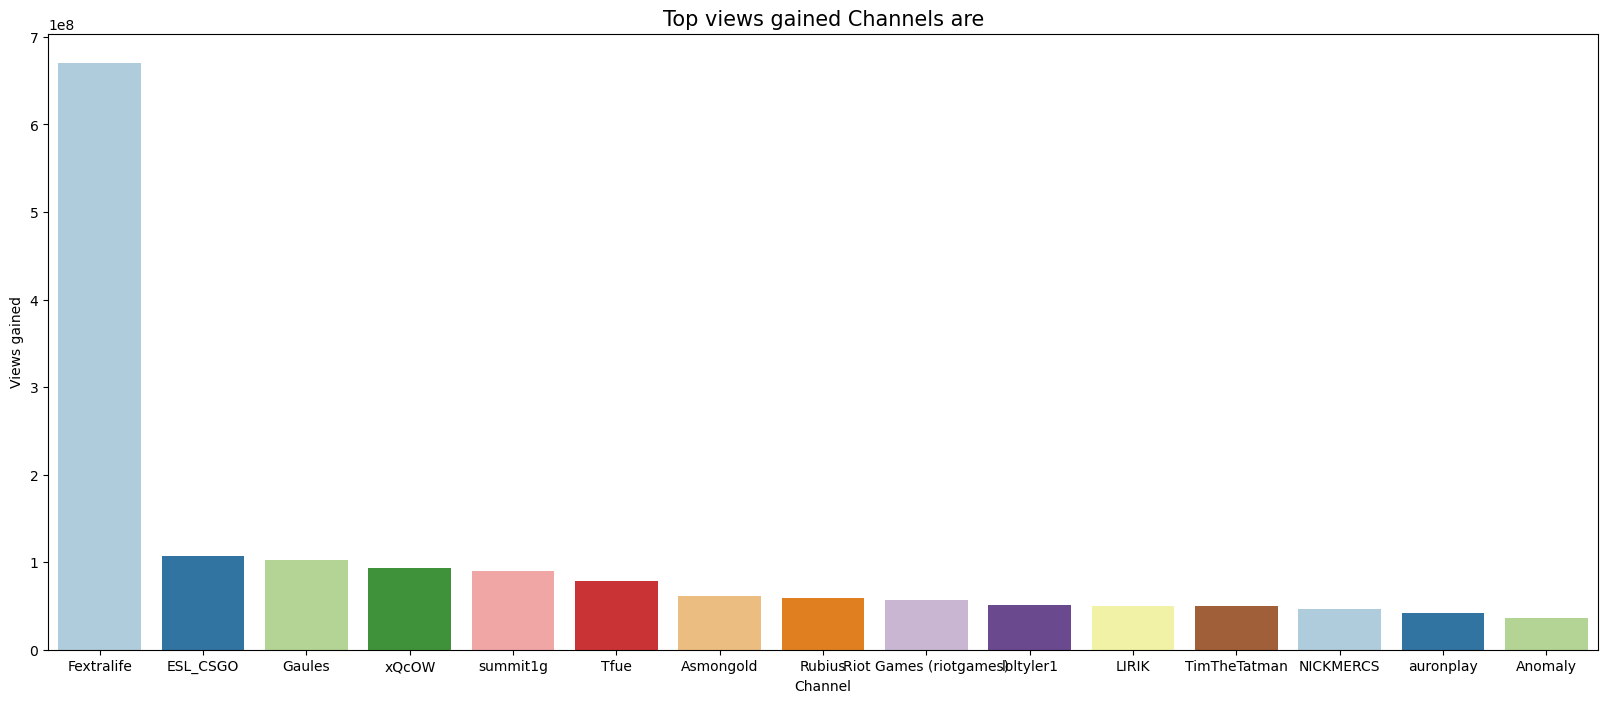

In [20]:
plt.figure(figsize=(20,8))
sns.barplot(x='Channel',y='Views gained',data=df[:15].sort_values(by='Views gained',ascending=False),palette='Paired')
plt.title("Top views gained Channels are", fontsize=15)

/tmp/ipykernel_34477/579629612.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


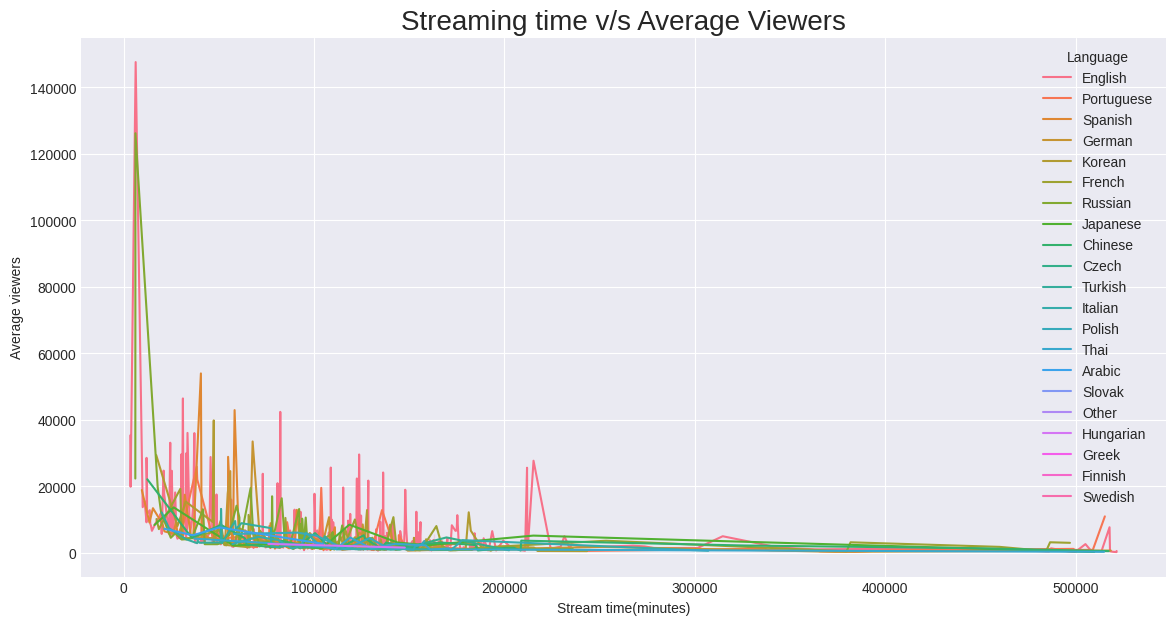

In [21]:
plt.figure(figsize=(14,7))
plt.style.use('seaborn-darkgrid')
sns.lineplot(x="Stream time(minutes)" , y="Average viewers" , hue="Language" , data=df)
plt.title('Streaming time v/s Average Viewers', fontsize = 20)
plt.show()

/tmp/ipykernel_34477/4053622297.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


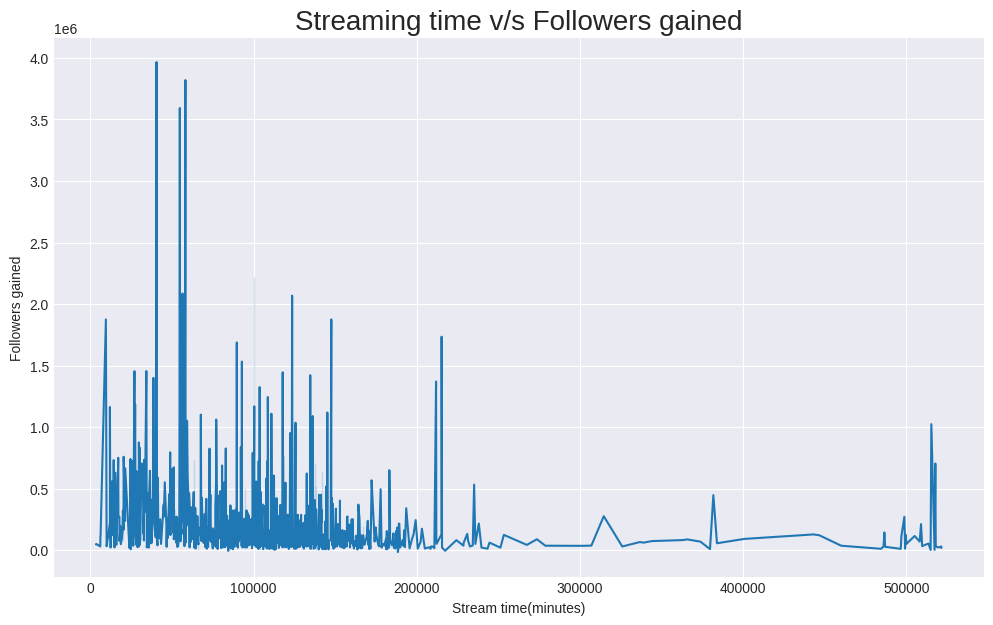

In [30]:
plt.figure(figsize=(12,7)) 
plt.style.use('seaborn-darkgrid')
sns.lineplot(x=df['Stream time(minutes)'], y=df['Followers gained'])
plt.title('Streaming time v/s Followers gained', fontsize = 20)
plt.show()

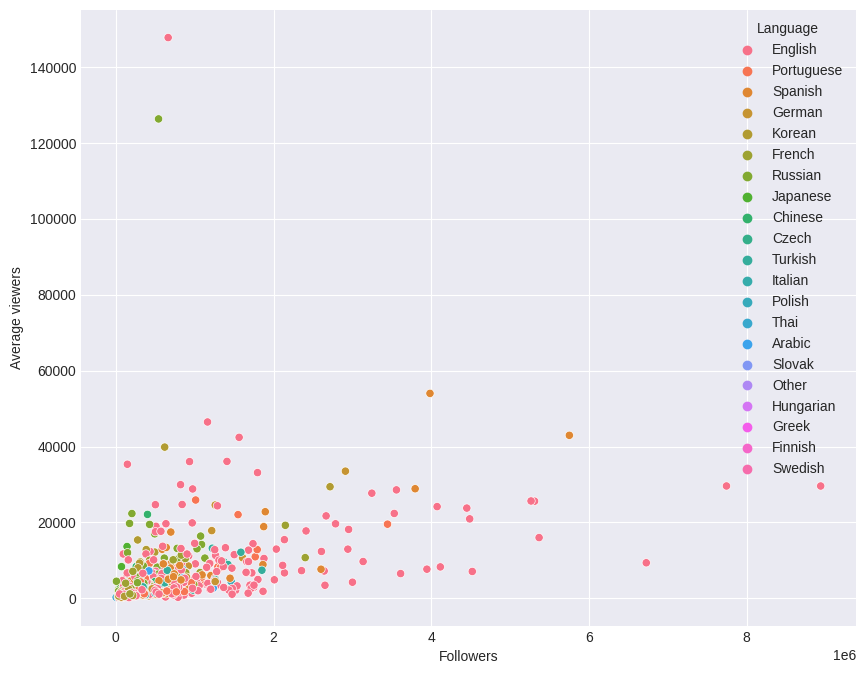

In [31]:
plt.figure(figsize=(10,8))
sns.scatterplot(x=df.Followers , y=df['Average viewers'], hue=df.Language )
plt.show()

Text(0.5, 1.0, 'Followers in Language')

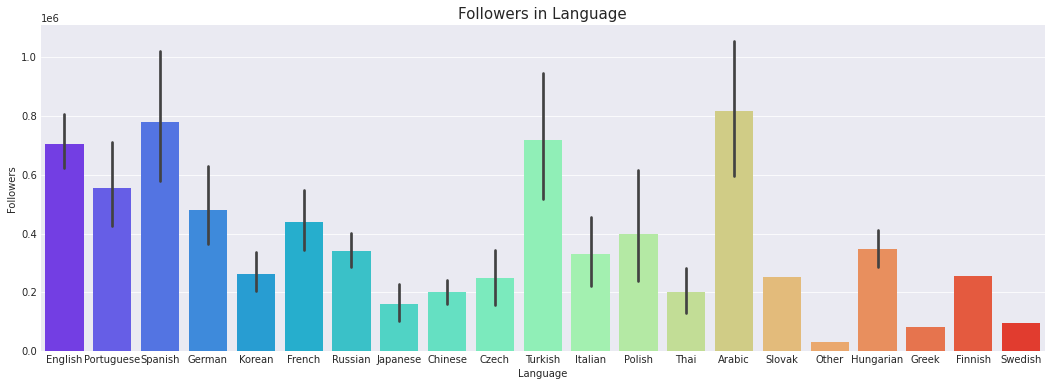

In [20]:
plt.figure(figsize=(18,6))
sns.barplot(x=df.Language, y=df.Followers, palette='rainbow')
plt.title('Followers in Language', fontsize=15)

<AxesSubplot:xlabel='Language', ylabel='Average viewers'>

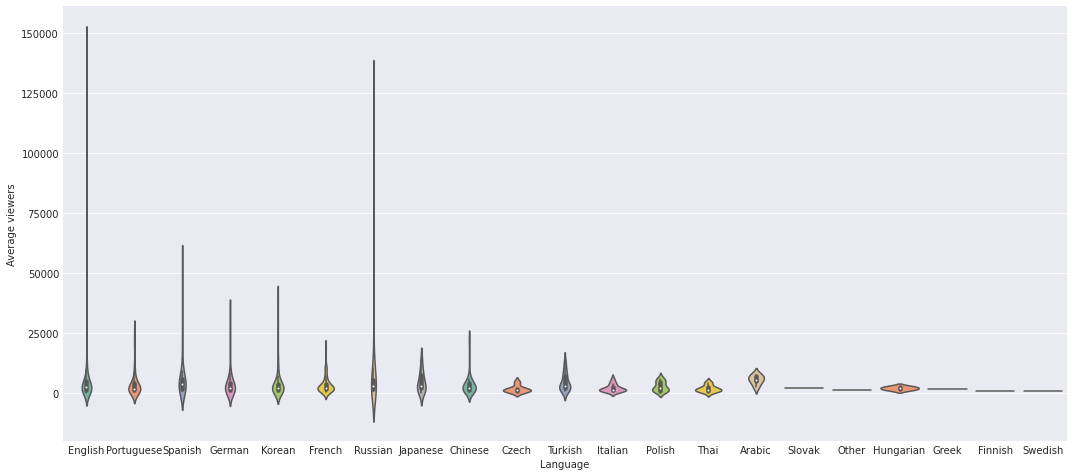

In [21]:
plt.figure(figsize=(18,8))
sns.violinplot(x=df.Language, y=df['Average viewers'], palette='Set2')

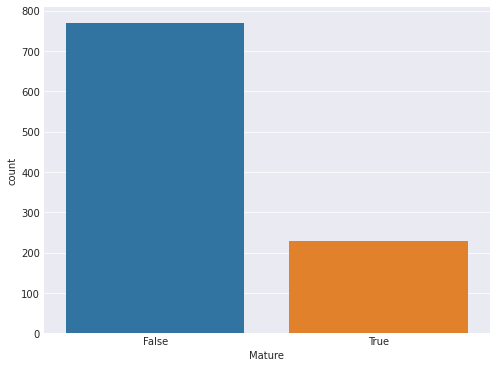

In [22]:
plt.figure(figsize=(8, 6))
plot = sns.countplot(x="Mature", data=df, order=df['Mature'].value_counts().index)

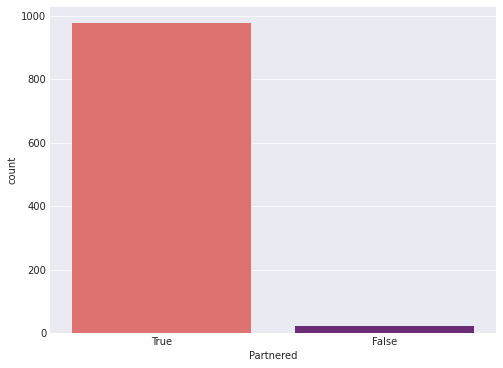

In [23]:
plt.figure(figsize=(8, 6))
plot = sns.countplot(x="Partnered", data=df, palette='magma_r', order=df['Partnered'].value_counts().index)

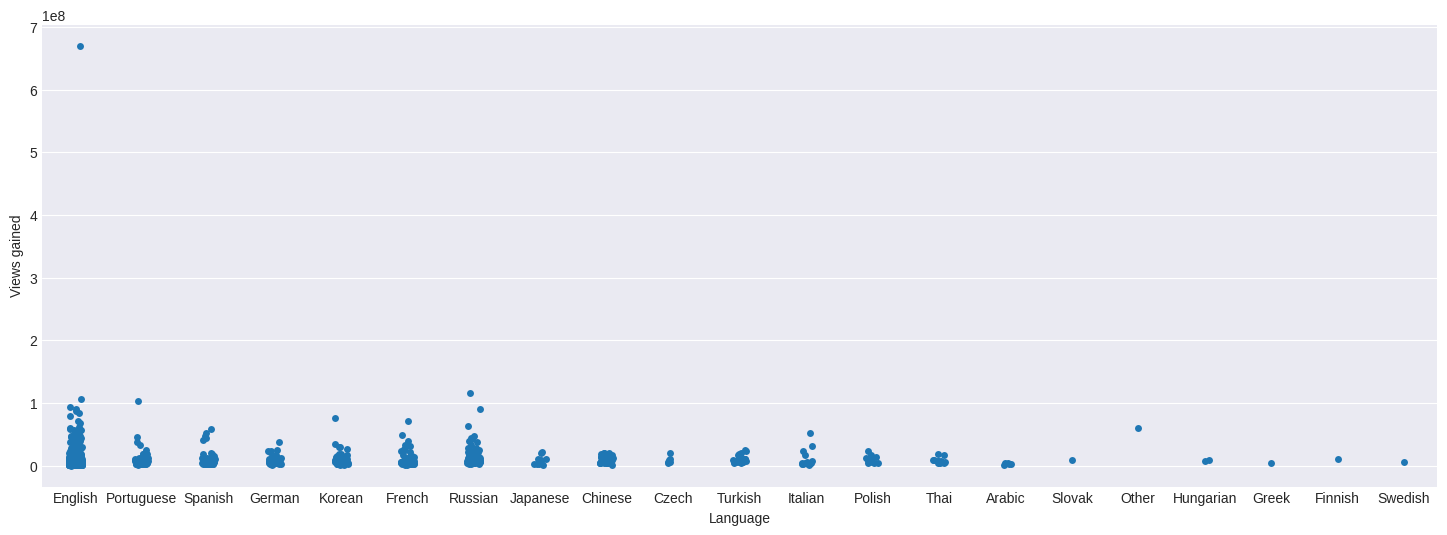

In [33]:
plt.figure(figsize=(18,6))
sns.stripplot(x="Language" , y = "Views gained" ,data=df)
plt.show()

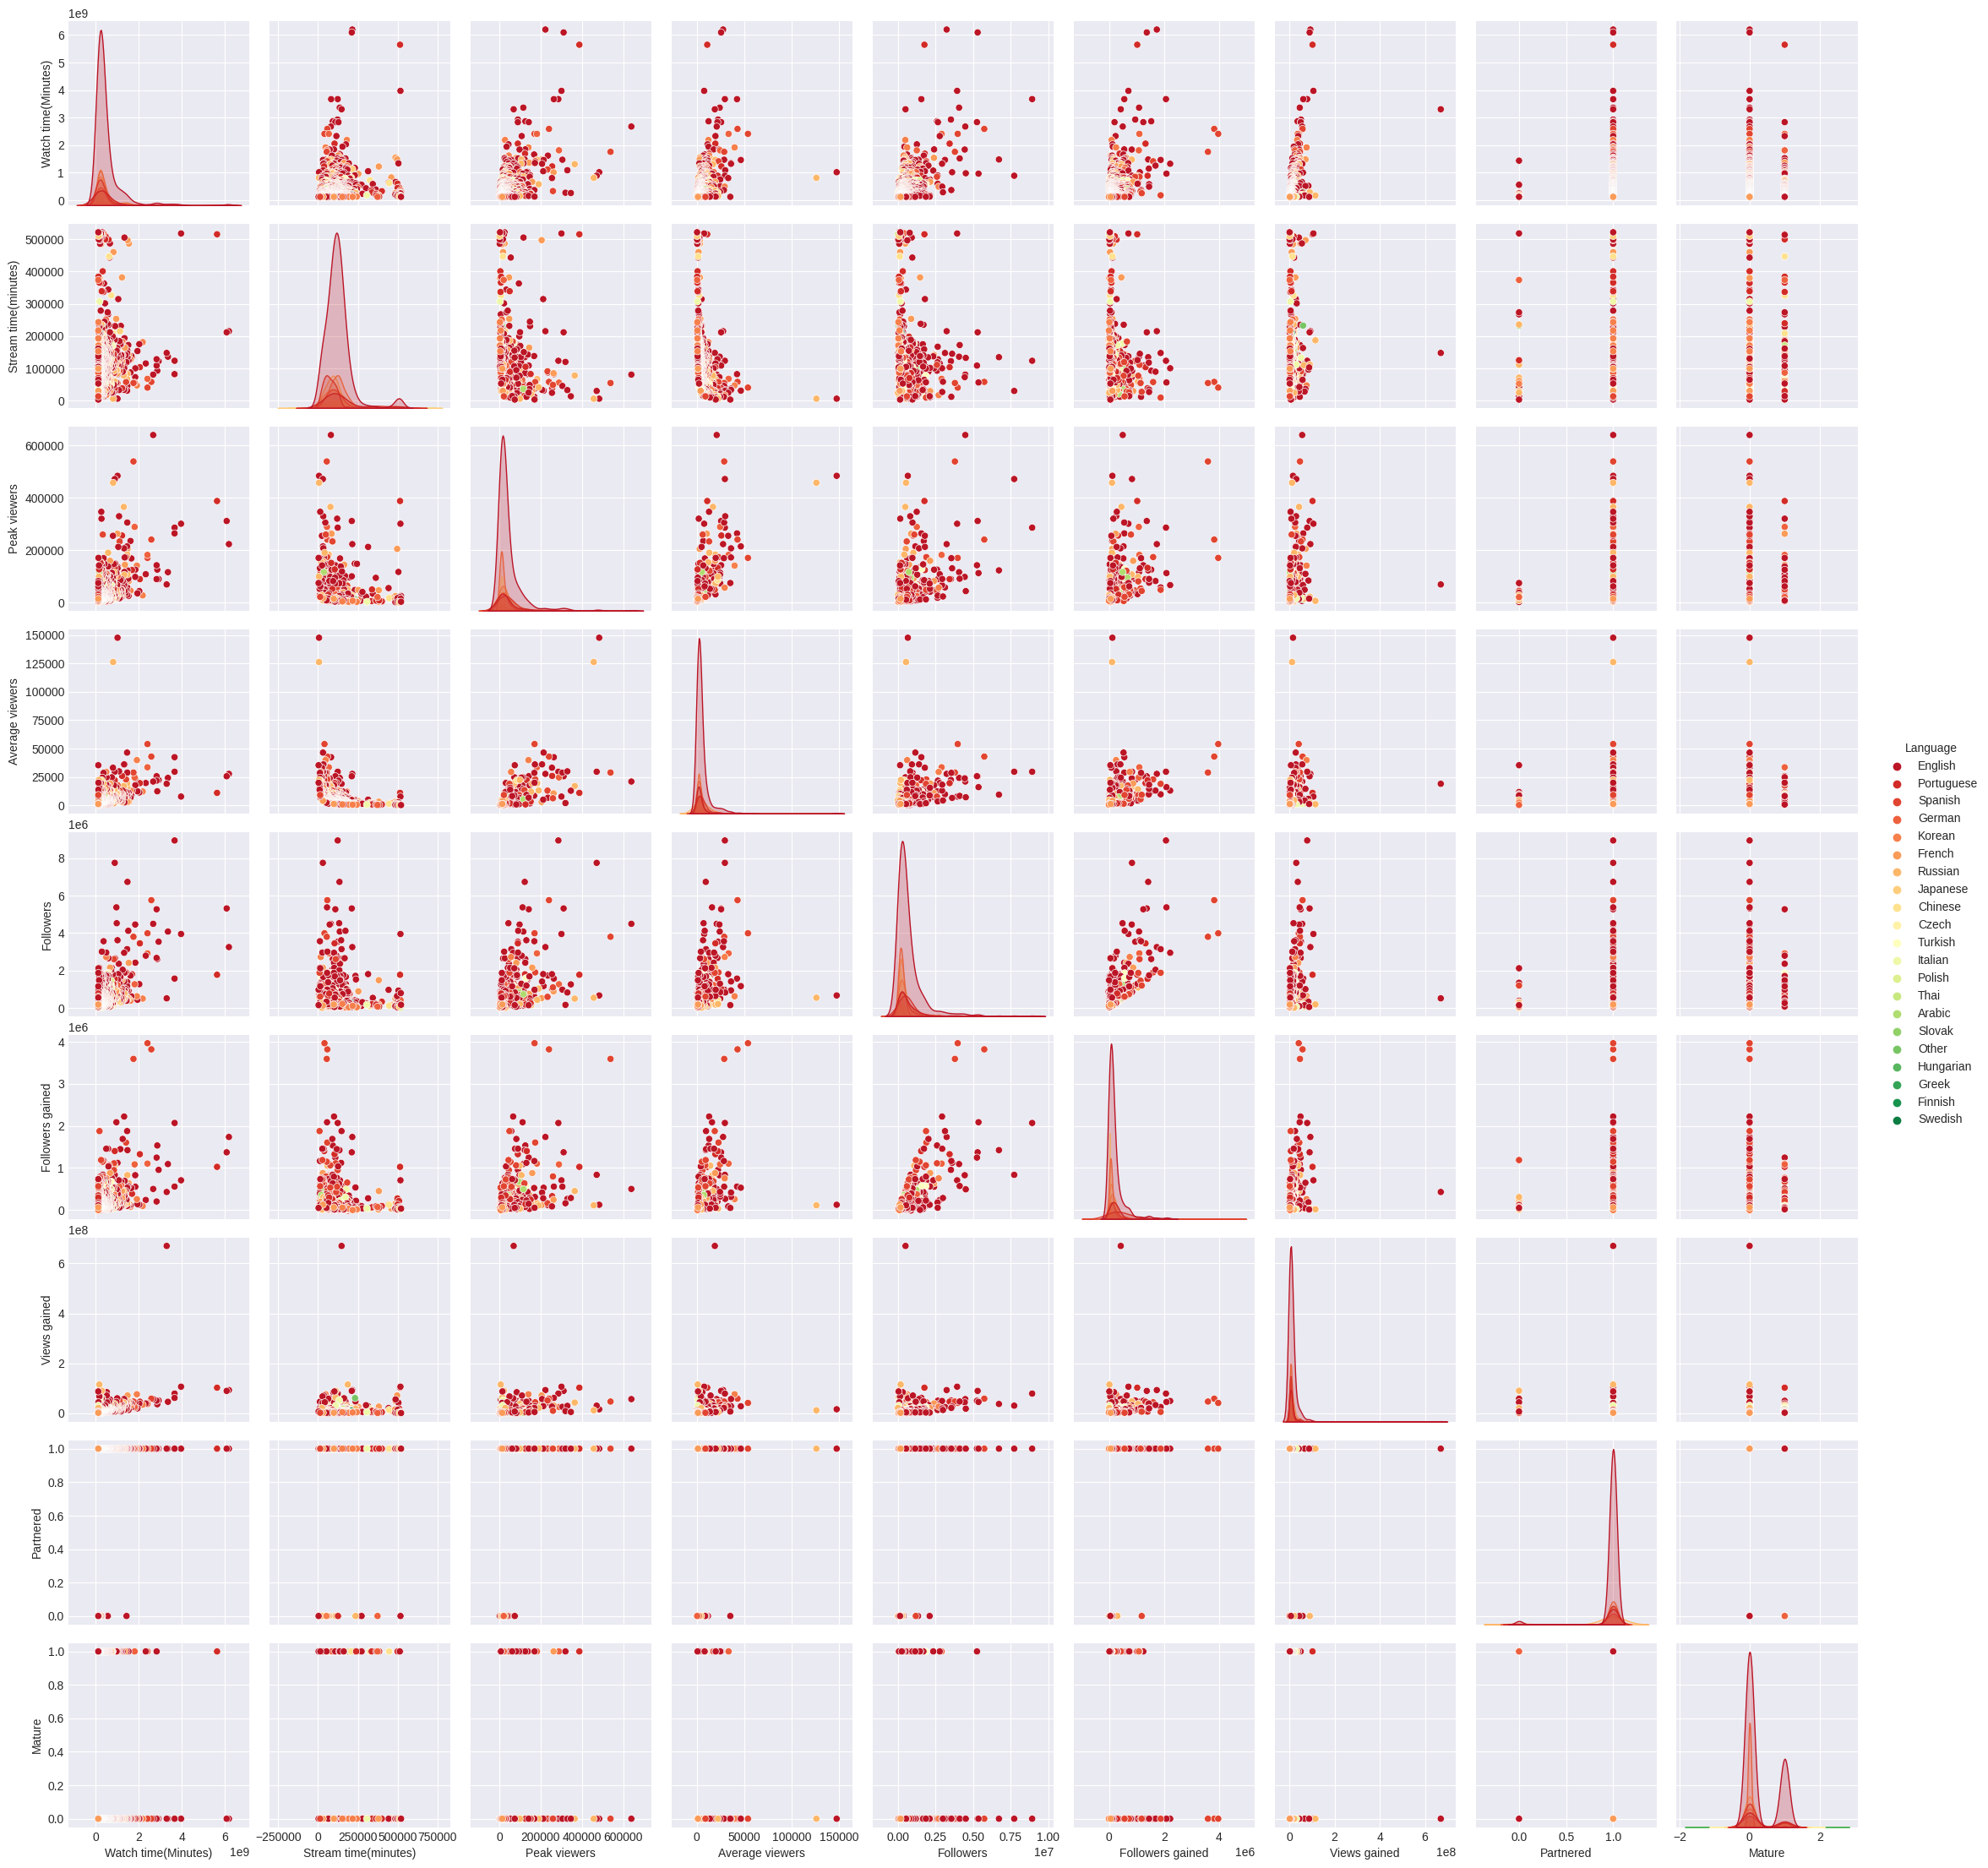

In [34]:
sns.pairplot(df, hue = 'Language', palette='RdYlGn')
plt.show()

/tmp/ipykernel_34477/3567563306.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), yticklabels='auto', annot=True, cmap='YlGn')


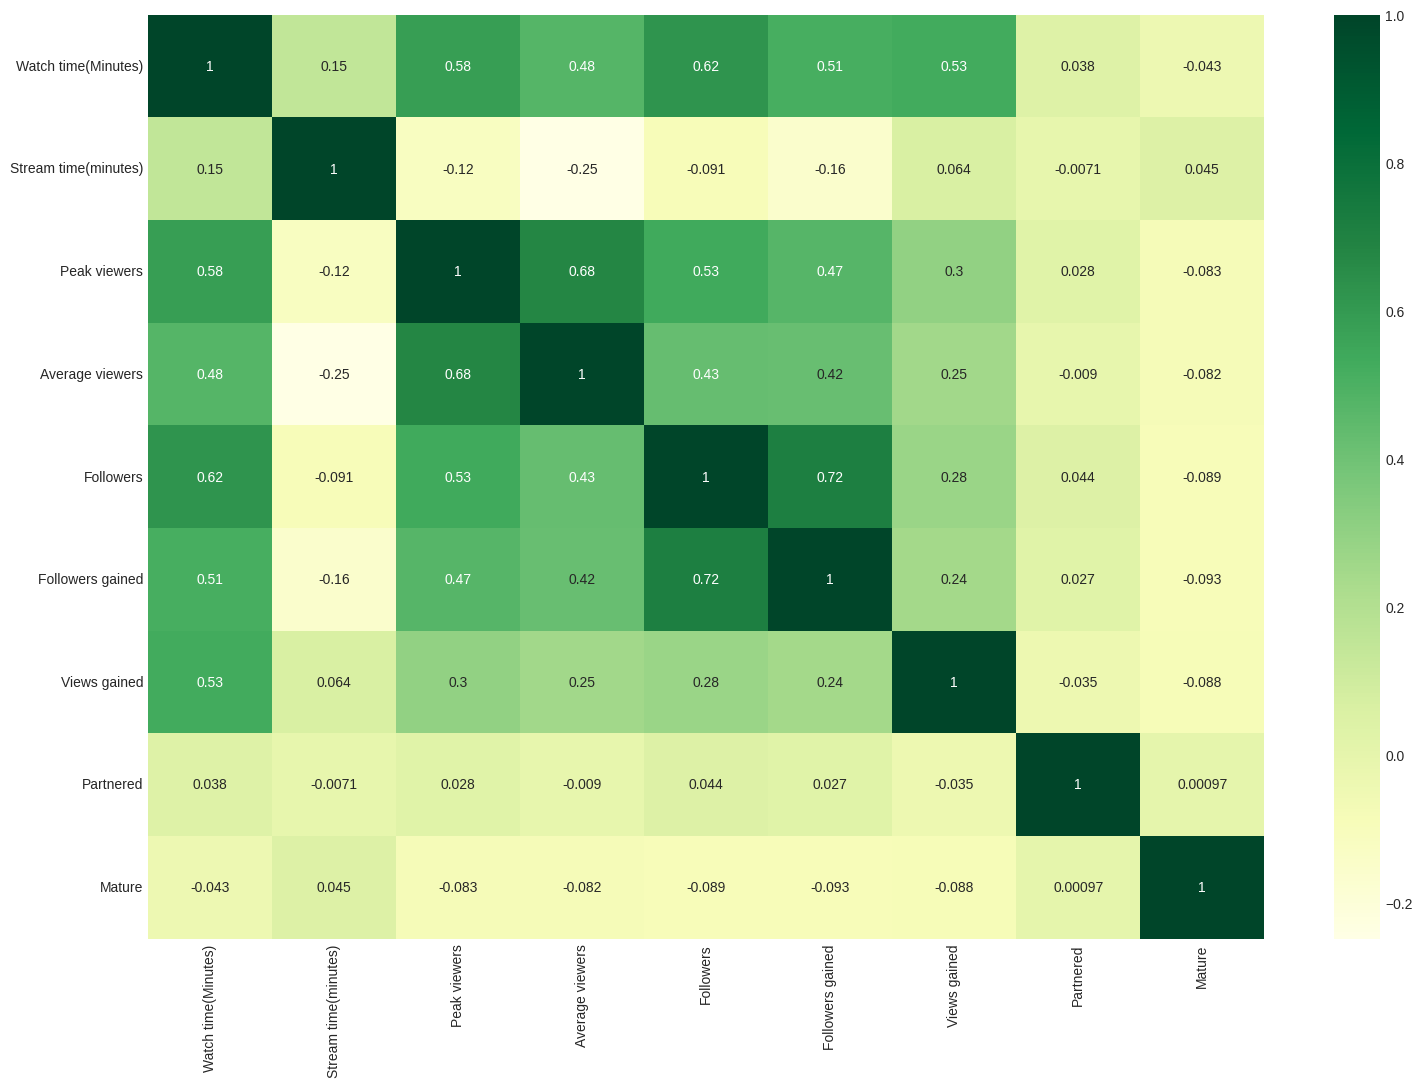

In [35]:
plt.figure(figsize=(18,12))
sns.heatmap(df.corr(), yticklabels='auto', annot=True, cmap='YlGn')
plt.show()

In [40]:
from sklearn.preprocessing import LabelEncoder
labelencoding = LabelEncoder()
categories=['Partnered',	'Mature',	'Language']
df[categories]=df[categories].apply(lambda x:labelencoding.fit_transform(x))
df

,Watch time(Minutes),Stream time(minutes),Peak viewers,Average viewers,Followers,Followers gained,Views gained,Partnered,Mature,Language
0,6196161750,215250,222720,27716,3246298,1734810,93036735,1,0,3
1,6091677300,211845,310998,25610,5310163,1370184,89705964,1,0,3
2,5644590915,515280,387315,10976,1767635,1023779,102611607,1,1,14
3,3970318140,517740,300575,7714,3944850,703986,106546942,1,0,3
4,3671000070,123660,285644,29602,8938903,2068424,78998587,1,0,3
...,...,...,...,...,...,...,...,...,...,...
995,122524635,13560,21359,9104,601927,562691,2162107,1,0,17
996,122523705,153000,3940,793,213212,52289,4399897,1,0,11
997,122452320,217410,6431,567,109068,-4942,3417970,1,0,11
998,122311065,104745,10543,1153,547446,109111,3926918,1,0,3


In [ ]:
df = df.drop(['Channel'], axis=1)

In [42]:
df.dtypes

Watch time(Minutes)     int64
Stream time(minutes)    int64
Peak viewers            int64
Average viewers         int64
Followers               int64
Followers gained        int64
Views gained            int64
Partnered               int64
Mature                  int64
Language                int64
dtype: object

/tmp/ipykernel_34477/1080525907.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df.columns[i]], kde_kws={"color": "r", "lw": 3, "label": "KDE"}, hist_kws={"color": "b"})
/tmp/ipykernel_34477/1080525907.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df.columns[i]], kde_kws={"color"

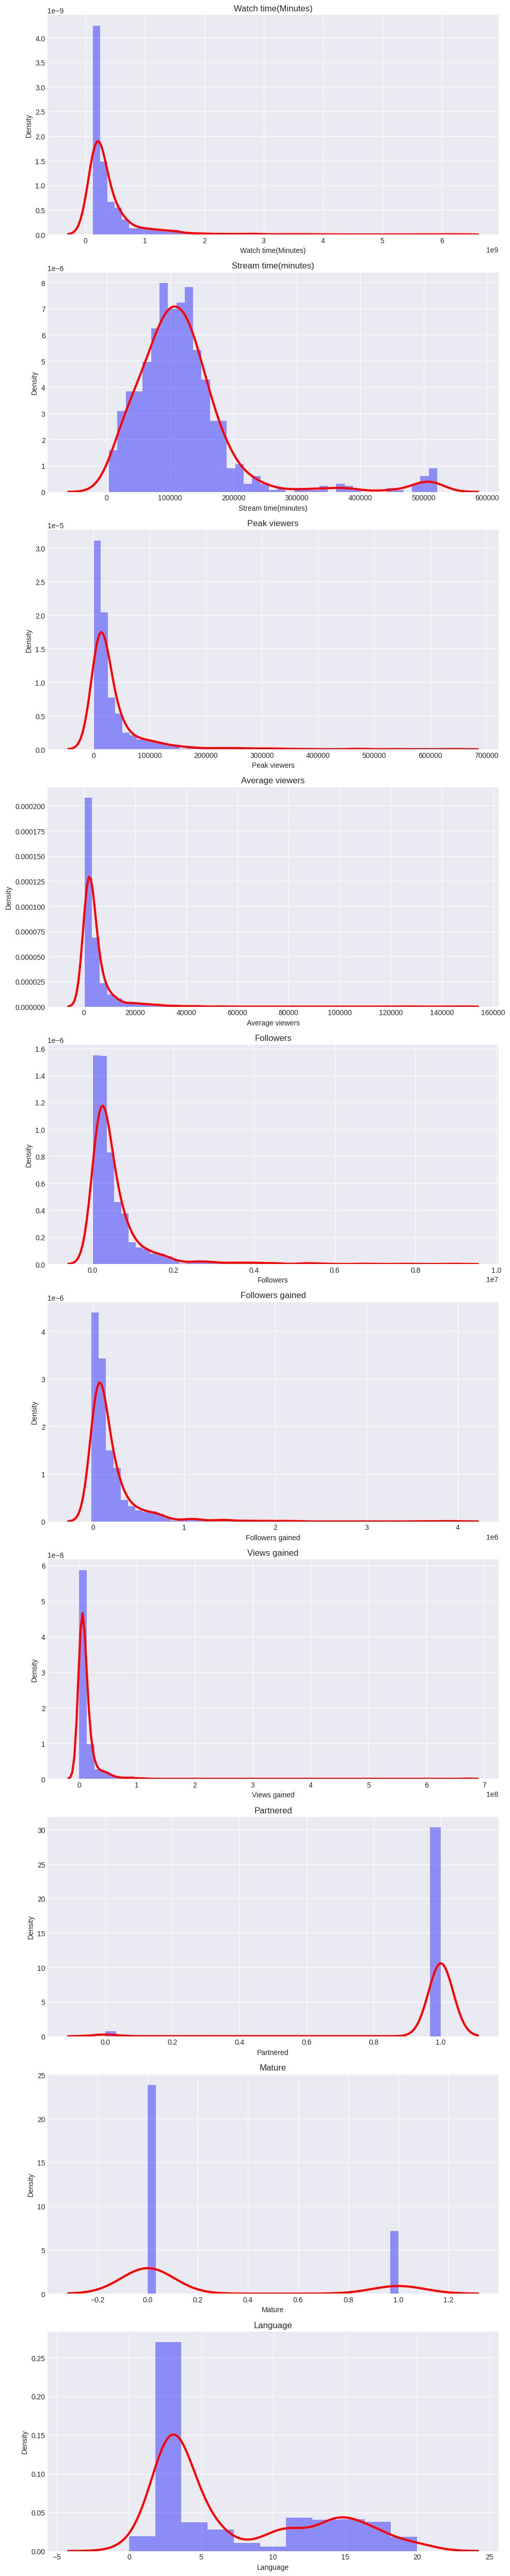

In [43]:
plt.figure(figsize=(10,50))
for i in range(len(df.columns)):
  plt.subplot(10, 1, i+1)
  sns.distplot(df[df.columns[i]], kde_kws={"color": "r", "lw": 3, "label": "KDE"}, hist_kws={"color": "b"})
  plt.title(df.columns[i])
  
plt.tight_layout()

# Splitting the Data into Dependent and Independent Variables

In [31]:
x = df.drop(['Partnered', 'Mature', 'Language'], axis=1)
y = df['Followers gained']

In [32]:
x.shape

(1000, 6)

# Feature Importance

In [33]:
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
model.fit(x,y)
print(model.feature_importances_)

[0.10131246 0.06187131 0.10840707 0.19962927 0.46402495 0.06475492]


In [34]:
feat_imp = pd.Series(model.feature_importances_, index=x.columns)

<AxesSubplot:>

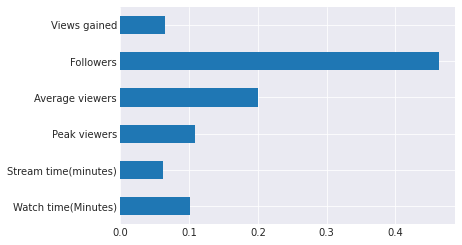

In [35]:
feat_imp.plot(kind='barh')

# Training and Testing the Data

In [36]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=25)

# Linear Regression

In [37]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(xtrain, ytrain)

LinearRegression()

## Prediction

In [38]:
ypred_train = lr.predict(xtrain)
ypred_test = lr.predict(xtest)

## Accuracy

In [39]:
from sklearn import metrics
print("Accuracy of training data:", metrics.r2_score(ytrain, ypred_train)*100)
ac1 = metrics.r2_score(ytest, ypred_test)*100
print("Accuracy of testing data:", ac1)

Accuracy of training data: 53.69612929734367
Accuracy of testing data: 53.29426334264469


## Error

In [40]:
print('Mean Absolute Error:', metrics.mean_absolute_error(ytest, ypred_test))
print('Mean Squared Error:', metrics.mean_squared_error(ytest, ypred_test))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(ytest, ypred_test)))

Mean Absolute Error: 123148.59557367934
Mean Squared Error: 47428017336.7476
Root Mean Squared Error: 217779.74501029152


# Decission Tree Regressor

In [41]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor(max_depth=5)
dt.fit(xtrain, ytrain)

DecisionTreeRegressor(max_depth=5)

## Prediction

In [42]:
ypred_train = dt.predict(xtrain)
ypred_test = dt.predict(xtest)

## Accuracy

In [43]:
from sklearn import metrics
print("Accuracy of training data:", metrics.r2_score(ytrain, ypred_train)*100)
ac2 = metrics.r2_score(ytest, ypred_test)*100
print("Accuracy of testing data:", ac2)

Accuracy of training data: 83.1597328505062
Accuracy of testing data: 58.87655619841754


## Error

In [44]:
print('Mean Absolute Error:', metrics.mean_absolute_error(ytest, ypred_test))
print('Mean Squared Error:', metrics.mean_squared_error(ytest, ypred_test))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(ytest, ypred_test)))

Mean Absolute Error: 113291.00348682489
Mean Squared Error: 41759397135.23532
Root Mean Squared Error: 204351.16132587875


# Random Forest Regressor

In [45]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(max_depth=8, ccp_alpha=0.05)
rf.fit(xtrain, ytrain)

RandomForestRegressor(ccp_alpha=0.05, max_depth=8)

## Prediction

In [46]:
ypred_train = rf.predict(xtrain)
ypred_test = rf.predict(xtest)

## Accuracy

In [47]:
from sklearn import metrics
print("Accuracy of training data:", metrics.r2_score(ytrain, ypred_train)*100)
ac3 = metrics.r2_score(ytest, ypred_test)*100
print("Accuracy of testing data:", ac3)

Accuracy of training data: 90.65065057250608
Accuracy of testing data: 63.061086556404014


## Error

In [48]:
print('Mean Absolute Error:', metrics.mean_absolute_error(ytest, ypred_test))
print('Mean Squared Error:', metrics.mean_squared_error(ytest, ypred_test))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(ytest, ypred_test)))

Mean Absolute Error: 109000.15449929003
Mean Squared Error: 37510155124.11558
Root Mean Squared Error: 193675.38595318605


# Comparing Accuracy

In [49]:
accuracy =  {ac1: 'Logistic Regression', ac2: 'Decission Tree', ac3:'Random Forest'}

<AxesSubplot:>

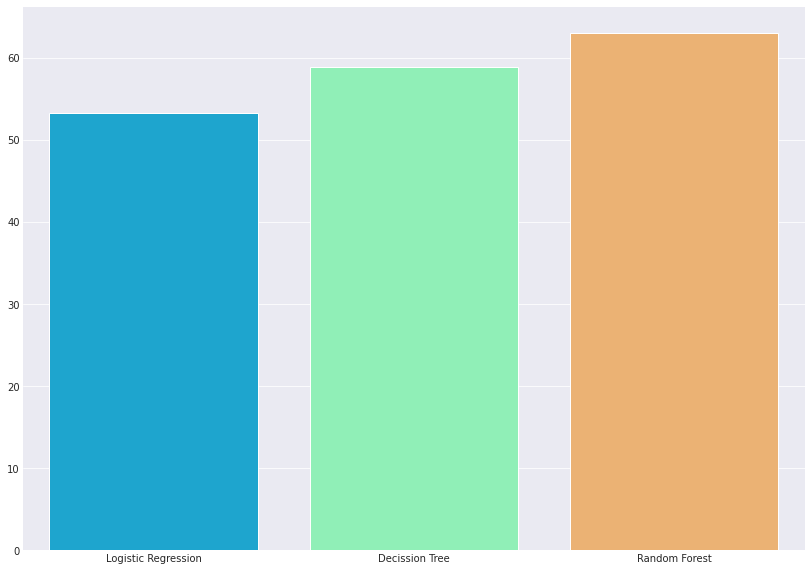

In [50]:
sns.set_style('darkgrid')
plt.figure(figsize=(14, 10))
model_accuracies = list(accuracy.values())
model_names = list(accuracy.keys())
sns.barplot(x=model_accuracies, y=model_names, palette='rainbow')

As accuracy of **Random Forest Regressor** algorithm is more ie. **63.58%** ~ **64%**

Hence we will save the model.

# Saving the Model

In [51]:
import pickle
pickle.dump(rf, open('model.pkl', 'wb'))

# Sample Prediction

In [52]:
p = rf.predict([[6196161750,	215250,	222720,	27716,	3246298,	93036735	]])
print("Followers Gained = ", int(p))

Followers Gained =  1648307
